In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_circles


In [2]:
# Generate dataset 
def generate_datasets():
    X_moons,_= make_moons(n_samples=300, noise=0.05, random_state=42)
    X_blobs,_= make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
    X_circles,_ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

    return X_moons, X_blobs, X_circles
X_moons, X_blobs, X_circles = generate_datasets()


In [3]:
# Scaling the datasets
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)
X_blobs_scaled = scaler.fit_transform(X_blobs)
X_circles_scaled = scaler.fit_transform(X_circles)

<Figure size 640x480 with 0 Axes>

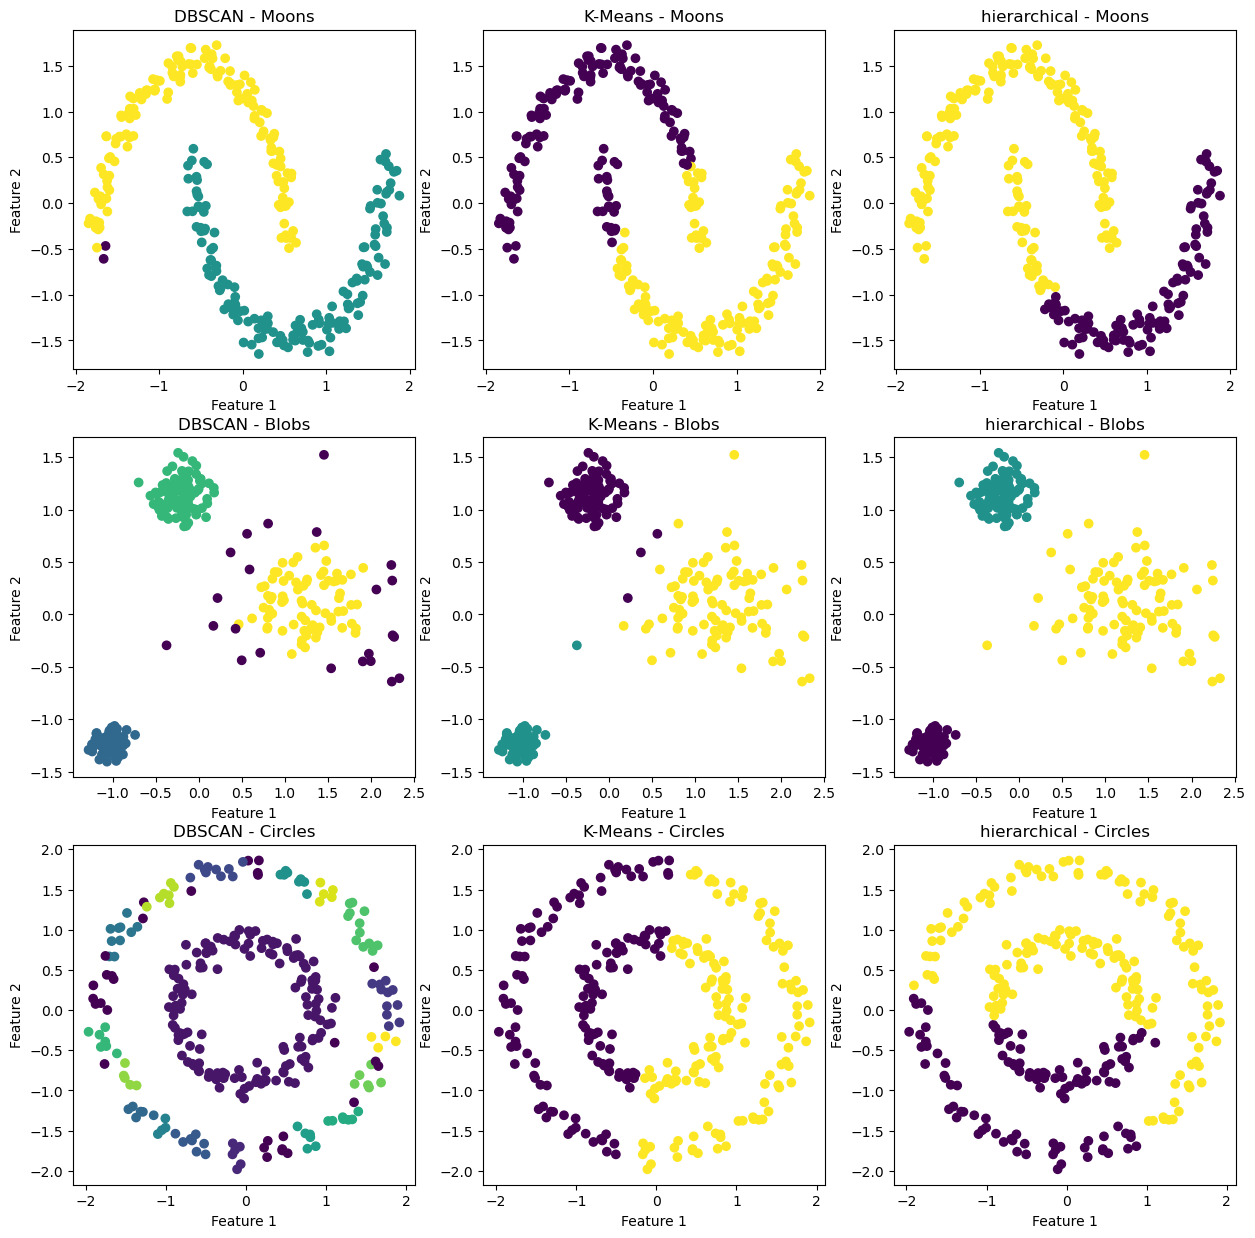

In [4]:
# Clustering and plotting function
def plot_clusters(X, lables, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=lables, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
#  Apply clustering and plot results
def apply_clustering_and_plot(X_moons, X_blobs, X_circles):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15), squeeze=False)
    
    datasets = [X_moons, X_blobs, X_circles]
    dataset_names = ["Moons", "Blobs", "Circles"]
    cluster_counts = [2, 3, 2] # Expected clusters for K-Means & Hierarchical


# DBSCAN, K-Means and Hierarchical clustering

# Loop through each dataset 
    for i, (X, name, clusters) in enumerate(zip(datasets, dataset_names, cluster_counts)):
    
        # DBSCAN
        dbscan_labels = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)
        plot_clusters(X, dbscan_labels, f"DBSCAN - {name}", axes[i, 0])
        
        # K-Means
        kmeans_labels = KMeans(n_clusters=clusters, random_state=42).fit_predict(X)
        plot_clusters(X, kmeans_labels, f"K-Means - {name}", axes[i, 1])
        
        # Hierarchical Clustering
        hier_labels = fcluster(linkage(X, method="ward"), t=clusters, criterion="maxclust")
        plot_clusters(X, hier_labels, f"hierarchical - {name}", axes[i, 2])
        
    
plt.tight_layout()
plt.show()


apply_clustering_and_plot(X_moons_scaled, X_blobs_scaled, X_circles_scaled)
    
    
